In [98]:
# IMPORT LIBRARIES

In [43]:
import pandas as pd
import numpy as np
import sklearn.datasets as  datasets
import matplotlib.pyplot as plt
import pydot as pyd
import pandas_profiling


from   sklearn                  import  tree
from   sklearn.tree             import  DecisionTreeClassifier
from sklearn.preprocessing      import LabelEncoder

from   sklearn                  import  metrics 
from   sklearn.metrics          import  classification_report
from   sklearn.metrics          import  confusion_matrix
from   sklearn.metrics          import  accuracy_score
from   sklearn.metrics          import  roc_curve, auc
from   sklearn.model_selection  import  KFold 
from   sklearn.model_selection  import  train_test_split
import pydotplus

# Commet this if the data visualisations doesn't work on your side
%matplotlib inline

In [7]:
from   sklearn.model_selection import  cross_val_score
from   sklearn.model_selection import  KFold

# WRITE FUNCTIONS CONFUSION MATRIX

In [8]:
def draw_cm( actual, predicted ):
    
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# FUNCTIONS FOR ROC CURVE

In [9]:
def draw_roc( actual, probs ):

    import pandas            as   pd
    import numpy             as   np
    import seaborn           as   sns
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

# READING THE DATA

In [10]:
df = pd.read_csv('C:/Users/Arunkumar/Desktop/BABI/Capstone Project/dataset_38_sick.csv')

# Identifying the shape and structure of the Data frame

In [11]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
age                          3772 non-null object
sex                          3772 non-null object
on_thyroxine                 3772 non-null object
query_on_thyroxine           3772 non-null object
on_antithyroid_medication    3772 non-null object
sick                         3772 non-null object
pregnant                     3772 non-null object
thyroid_surgery              3772 non-null object
I131_treatment               3772 non-null object
query_hypothyroid            3772 non-null object
query_hyperthyroid           3772 non-null object
lithium                      3772 non-null object
goitre                       3772 non-null object
tumor                        3772 non-null object
hypopituitary                3772 non-null object
psych                        3772 non-null object
TSH_measured                 3772 non-null object
TSH                          3772 non-null 

(3772, 30)

### Overall summary Report of the Thyroid Dataset

In [12]:
profile = pandas_profiling.ProfileReport(df)
profile.to_file(outputfile="output.html")

All the Numerical values have high cardinality and provides an overview of the dataset 

# Data Processing steps

1. Target Variable is converted to Categorical Variable by assigning specific values . Here , the prediction is considered to be positive. So Sick is assigned as '1'
2. There are no Values present in TBG and TBG Measured value was 'false' . Hence the values are removed from the dataset
3 . Overall summary after the removal of columns is provided 

In [13]:
df['Class'] = df['Class'].apply(lambda x: 1 if x == 'sick' else 0)

In [14]:
df.drop(columns = 'TBG', axis = 0, inplace = True)
df.drop(columns = 'TBG_measured', axis = 0, inplace = True)

In [15]:
df.shape

(3772, 28)

In [16]:
feature_names   = df.columns
print(feature_names)


Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'referral_source', 'Class'],
      dtype='object')


# All the columns were imported as objects . Hence they were converted into categorical variables and floating point functions

In [17]:

list(set(df.dtypes.tolist()))
df_num = df.select_dtypes(include = ['float64'])
df_num.head()

""
0
1
2
3
4


In [46]:
for col in df.columns:
    if df[col].dtype==object and col not in ["age", "TSH","T3","TT4","T4U","FTI","Class"]:
        print(col)
        lbl = LabelEncoder()
        lbl.fit(list(df[col].values.astype('str'))) 
        df[col] = lbl.transform(list(df[col].values.astype('str')))

sex
on_thyroxine
query_on_thyroxine
on_antithyroid_medication
sick
pregnant
thyroid_surgery
I131_treatment
query_hypothyroid
query_hyperthyroid
lithium
goitre
tumor
hypopituitary
psych
TSH_measured
T3_measured
TT4_measured
T4U_measured
FTI_measured
referral_source


#### Before the EDA Process , there are numerous null values in the Data set. Actions are taken to manipulate the null values before proceeding

In [54]:
df1 = df.replace('?', np.NaN)
print(df1.isnull().sum())
df1.shape

age                            1
sex                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                          369
T3_measured                    0
T3                           769
TT4_measured                   0
TT4                          231
T4U_measured                   0
T4U                          387
FTI_measured                   0
FTI                          385
referral_source                0
Class                          0
dtype: int64


(3772, 28)

# Dropping Missing Values 

In [55]:
df1.dropna(inplace=True)

In [56]:
df1.shape

(2751, 28)

In [57]:
df1['age'] = df1['age'].astype('int32')
df1['TSH'] = df1['TSH'].astype('float64')
df1['T3']  = df1['T3'].astype('float64')
df1['TT4'] = df1['TT4'].astype('float64')
df1['T4U'] = df1['T4U'].astype('float64')
df1['FTI'] = df1['FTI'].astype('float64')

In [58]:
list(set(df1.dtypes.tolist()))
df1_num = df1.select_dtypes(include = ['float64','int32'])

# EDA

Plot of various graphs to understand the importance of the numeric variables that may affect the Thyroid prediction

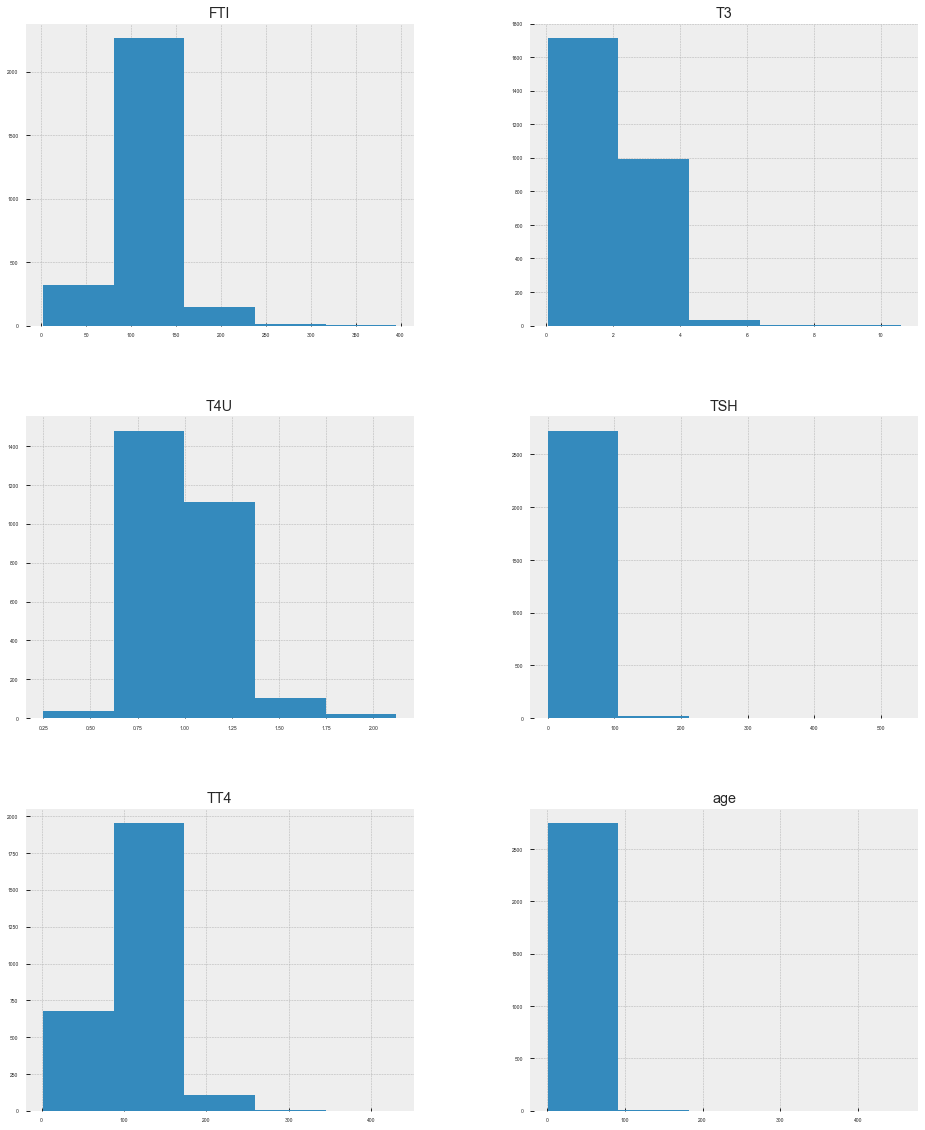

In [59]:
plt.style.use('bmh')
df1_num.hist(figsize=(16, 20), bins=5, xlabelsize=5, ylabelsize=5);
plt.savefig('thyroid.jpg')

# Correlation

Correlation of the variables with Target Variable :
Correlation is Calculated among the numeric variables . None of the Variables had a correlation function of greater than 0.5 and
also from the correlation co-efficients it can be concluded that more than the categorical variables the numerical variables like the TT4,
T4u and T3 harmones has higher impact in predicting the thyroid among patients 

In [60]:
df1_num = df1.select_dtypes(include = ['float64','int64','int32'])
df1_num_corr = df1_num.corr()['Class'][:-1] 
golden_features_list = df1_num_corr[abs(df1_num_corr) > 0.1].sort_values(ascending=False)
print("There is {} strongly correlated values with Class:\n{}".format(len(golden_features_list), golden_features_list))



There is 4 strongly correlated values with Class:
age    0.161450
TT4   -0.125715
T4U   -0.241457
T3    -0.394737
Name: Class, dtype: float64


Correlation among the Variables :
Same point illustrated above implies here too. Correlation is strong among the numeric variables and they predict the Thyroid in patients

# Correlation plot among independant variables

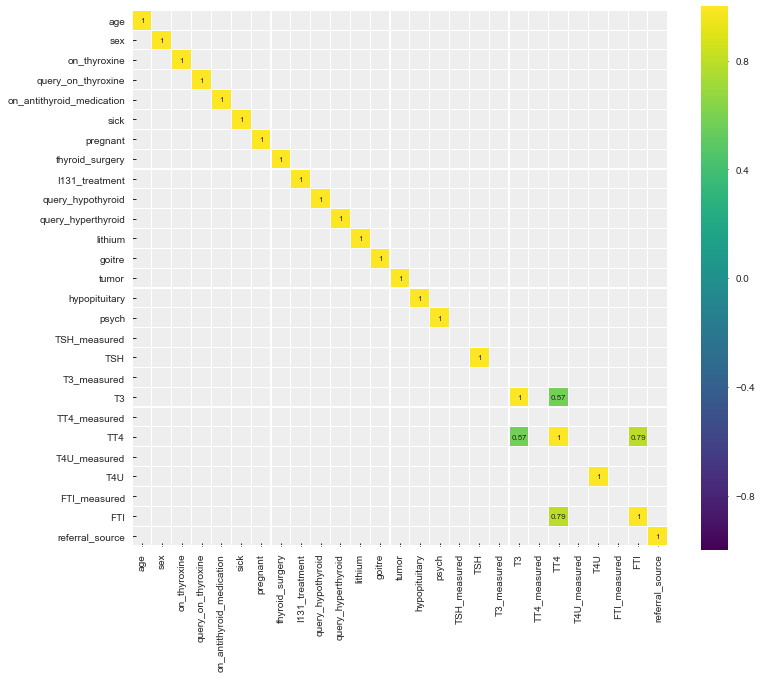

In [61]:
corr = df1_num.drop('Class', axis=1).corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.savefig('Corr.jpg')

# TO GET THE PROPORTION OF CATEGORY IN EACH COLUMNS

In [62]:
categorical_columns = ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', \
                        'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', \
                        'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured',\
                        'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', \
                        'referral_source', 'Class']
for name1 in categorical_columns:
    print("\nColumn: ", name1,"\n")
    print(df1[name1].value_counts())


Column:  sex 

1    1764
2     879
0     108
Name: sex, dtype: int64

Column:  on_thyroxine 

0    2471
1     280
Name: on_thyroxine, dtype: int64

Column:  query_on_thyroxine 

0    2727
1      24
Name: query_on_thyroxine, dtype: int64

Column:  on_antithyroid_medication 

0    2718
1      33
Name: on_antithyroid_medication, dtype: int64

Column:  sick 

0    2635
1     116
Name: sick, dtype: int64

Column:  pregnant 

0    2708
1      43
Name: pregnant, dtype: int64

Column:  thyroid_surgery 

0    2717
1      34
Name: thyroid_surgery, dtype: int64

Column:  I131_treatment 

0    2707
1      44
Name: I131_treatment, dtype: int64

Column:  query_hypothyroid 

0    2601
1     150
Name: query_hypothyroid, dtype: int64

Column:  query_hyperthyroid 

0    2580
1     171
Name: query_hyperthyroid, dtype: int64

Column:  lithium 

0    2737
1      14
Name: lithium, dtype: int64

Column:  goitre 

0    2731
1      20
Name: goitre, dtype: int64

Column:  tumor 

0    2691
1      60
Name: tumo

#We cannot use columns with constant values. In our dataset, the following fields have constant value, t for True: a. TSH measured b. T3 measured c. TT4measured d. T4Umeasured e. FTImeasured f. TBGmeasure Also, the field, hypopituitary is having only one value as True, rest as False. So we cannot use this field as well.

So, we remove all these columns


In [63]:
unwanted_columns    = ['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','hypopituitary']
#df1.drop(columns     = unwanted_columns, inplace = True )
categorical_columns = ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', \
                        'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', \
                        'lithium', 'goitre', 'tumor', 'psych', 'referral_source', 'Class']
feature_names   = df1.columns

In [64]:
print(df1.shape)
feature_names

(2751, 28)


Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'referral_source', 'Class'],
      dtype='object')

Observations

We have started with 3772 observations and 30 columns.
* There are ? values for some observations in seven fields and all observations in the field, TBG.
* Those values are removed for the model built 
* Since 100% of observations have null value in the field, TBG, we need to remove the field for our analysis.
* Now, we have 2751 not null observations out of 3772 total observations.
* We have removed TBG column full of null values from the dataframe.
* We have removed columns such as 'TSH measured','T3 measured','TT4 measured','T4U measured','FTI measured','TBG measured' and 'hypopituitary' with constant or near constant values. 
* We have retained only 22 columns instead of 30 columns.

Data is not balanced since the class distribution in the target variable is in the ratio 216: 2427


In [65]:
import seaborn as sns

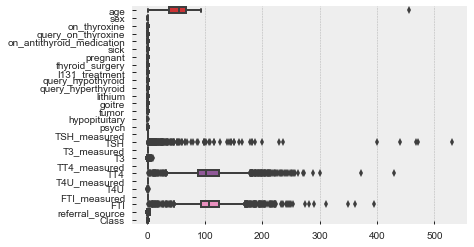

<Figure size 432x288 with 0 Axes>

In [66]:
ax = sns.boxplot(data = df1, orient = "h", palette = "Set1")
plt.show()
plt.savefig('box.jpg')

# Outlier detection function

In [67]:
def outlier_detect(df):
    for i in df.describe().columns:

        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(df[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
               p.append(j)
        print('\n Outliers for Column : ', i, ' Outliers count ', len(p))
        print(p)

In [68]:
all_columns         = list(df1)
numeric_columns     = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
categorical_columns = [x for x in all_columns if x not in numeric_columns ]

print('\nNumeric columns')
print(numeric_columns)
print('\nCategorical columns')
print(categorical_columns)


Numeric columns
['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

Categorical columns
['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'referral_source', 'Class']


In [69]:
x =  df1[numeric_columns]
outlier_detect(x)


 Outliers for Column :  age  Outliers count  1
[455]

 Outliers for Column :  TSH  Outliers count  291
[6.0, 13.0, 7.3, 45.0, 14.8, 15.0, 19.0, 9.0, 7.8, 160.0, 12.0, 8.8, 151.0, 7.8, 13.0, 6.0, 26.0, 143.0, 108.0, 9.2, 86.0, 9.1, 52.0, 6.1, 31.0, 5.8, 51.0, 6.3, 9.6, 42.0, 12.0, 25.0, 8.6, 6.2, 9.7, 28.0, 17.0, 18.0, 55.0, 14.0, 16.0, 10.0, 6.7, 7.6, 8.0, 11.0, 11.0, 44.0, 7.9, 11.0, 15.0, 7.2, 12.0, 6.4, 7.1, 199.0, 19.0, 24.0, 15.0, 188.0, 98.0, 22.0, 6.6, 7.6, 35.0, 8.2, 12.0, 6.1, 7.1, 11.0, 60.0, 55.0, 22.0, 29.0, 13.0, 7.2, 6.2, 11.0, 6.0, 7.5, 34.0, 10.0, 6.5, 103.0, 9.4, 28.0, 11.0, 7.9, 6.1, 13.0, 8.9, 9.3, 42.0, 7.2, 26.0, 11.0, 6.3, 54.0, 8.3, 7.5, 15.0, 7.1, 15.0, 8.1, 60.0, 18.0, 9.2, 100.0, 17.0, 13.0, 16.0, 41.0, 183.0, 8.9, 10.0, 7.1, 42.0, 12.0, 8.3, 6.9, 12.1, 43.0, 8.2, 18.0, 25.0, 7.3, 8.6, 10.0, 15.0, 8.4, 34.0, 6.8, 8.5, 6.4, 151.0, 11.0, 6.2, 9.0, 11.0, 11.0, 26.0, 6.8, 35.0, 8.1, 38.0, 44.0, 9.9, 6.8, 9.8, 11.0, 6.2, 12.0, 11.1, 27.0, 8.6, 15.0, 7.2, 76.0, 13.

# Create X, independent variable and y dependent variable

In [70]:
feature_names1 =  feature_names.drop('Class')
X              =  df1.loc[:,feature_names1] 
y              =  df1.loc[:,'Class']
label_names    =  y.unique()
print(X.shape)
print(y.shape)

(2751, 27)
(2751,)


In [71]:
y.value_counts().apply(lambda x: [x, ( x * 100) / df.shape[0]])

0    [2533, 67.15270413573701]
1     [218, 5.779427359490986]
Name: Class, dtype: object

# Split the data into training and test data set

In [72]:
seed      = 1
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

In [73]:
clf    = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf    = clf.fit(X_train,y_train)

In [74]:
#Predict the response for test dataset
predicted_test= clf.predict(X_test)
predicted_train=clf.predict(X_train)


Test Data
[[756   5]
 [  9  56]]
Training Accuracy: 100.000%
Testing Accuracy: 98.305%


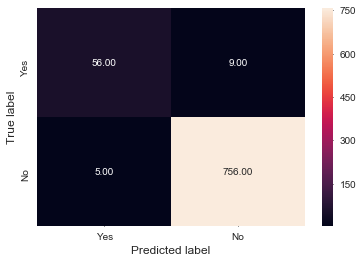

<Figure size 432x288 with 0 Axes>

In [75]:
matrix = confusion_matrix(y_test, predicted_test)
print("\nTest Data")
print(matrix)

accuracy_train = accuracy_score(y_train, predicted_train)
accuracy_test = accuracy_score(y_test, predicted_test)
print("Training Accuracy: %.3f%%" % (accuracy_train * 100.0))
print("Testing Accuracy: %.3f%%" % (accuracy_test * 100.0))
draw_cm(y_test, predicted_test)
plt.savefig('cm.jpg')



# Performance measures calculation

In [76]:
measures_test= classification_report(y_test, predicted_test) 
print("\nTest data")
print(measures_test)


Test data
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       761
           1       0.92      0.86      0.89        65

   micro avg       0.98      0.98      0.98       826
   macro avg       0.95      0.93      0.94       826
weighted avg       0.98      0.98      0.98       826



# ROC Curve for the model 

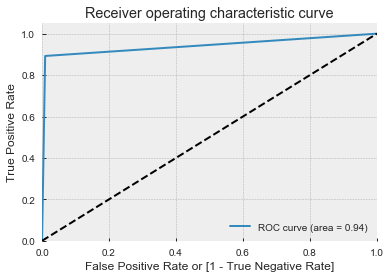

(array([0.        , 0.00919842, 1.        ]),
 array([0.        , 0.89230769, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [444]:
draw_roc(y_test, predicted_test)

In [87]:
df2 = df.replace('?', np.NaN)
print(df2.isnull().sum())
df2.shape

age                            1
sex                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                          369
T3_measured                    0
T3                           769
TT4_measured                   0
TT4                          231
T4U_measured                   0
T4U                          387
FTI_measured                   0
FTI                          385
referral_source                0
Class                          0
dtype: int64


(3772, 28)

# Missing Values using Median

In [88]:

df3=df2.fillna(df2.median())
df3.shape


(3772, 28)

In [89]:
df3.shape


(3772, 28)

In [90]:
df3_num = df3.select_dtypes(include = ['float64','int64','int32'])
df3_num_corr = df3_num.corr()['Class'][:-1] 
golden_features_list = df3_num_corr[abs(df3_num_corr) > 0.1].sort_values(ascending=False)
print("There is {} strongly correlated values with Class:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with Class:
T3_measured    0.121016
Name: Class, dtype: float64


In [91]:
feature_names1 =  feature_names.drop('Class')
X              =  df3.loc[:,feature_names1] 
y              =  df3.loc[:,'Class']
label_names    =  y.unique()
print(X.shape)
print(y.shape)

(3772, 27)
(3772,)


In [92]:
seed      = 1
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)
df2.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,referral_source,Class
0,41,1,0,0,0,0,0,0,0,0,...,1,2.5,1,125,1,1.14,1,109,1,0
1,23,1,0,0,0,0,0,0,0,0,...,1,2,1,102,0,NaN,0,NaN,4,0
2,46,2,0,0,0,0,0,0,0,0,...,0,NaN,1,109,1,0.91,1,120,4,0
3,70,1,1,0,0,0,0,0,0,0,...,1,1.9,1,175,0,NaN,0,NaN,4,0
4,70,1,0,0,0,0,0,0,0,0,...,1,1.2,1,61,1,0.87,1,70,3,0


In [93]:
clf1   = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf1    = clf1.fit(X_train,y_train)

In [94]:
#Predict the response for test dataset
predicted_test= clf1.predict(X_test)
predicted_train=clf1.predict(X_train)


Test Data
[[1055    8]
 [   7   62]]
Training Accuracy: 100.000%
Testing Accuracy: 98.675%


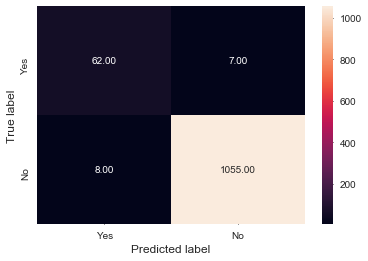

In [95]:
matrix = confusion_matrix(y_test, predicted_test)
print("\nTest Data")
print(matrix)
    
accuracy_train = accuracy_score(y_train, predicted_train)
accuracy_test = accuracy_score(y_test, predicted_test)
print("Training Accuracy: %.3f%%" % (accuracy_train * 100.0))
print("Testing Accuracy: %.3f%%" % (accuracy_test * 100.0))
draw_cm(y_test, predicted_test)

In [96]:
measures_test= classification_report(y_test, predicted_test) 
print("\nTest data")
print(measures_test)


Test data
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1063
           1       0.89      0.90      0.89        69

   micro avg       0.99      0.99      0.99      1132
   macro avg       0.94      0.95      0.94      1132
weighted avg       0.99      0.99      0.99      1132



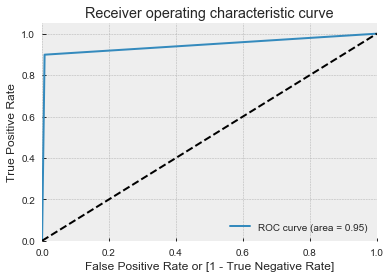

(array([0.        , 0.00752587, 1.        ]),
 array([0.        , 0.89855072, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [97]:
draw_roc(y_test, predicted_test)

# Plotting Feature Importances 

In [80]:

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [feature_names[i] for i in indices]

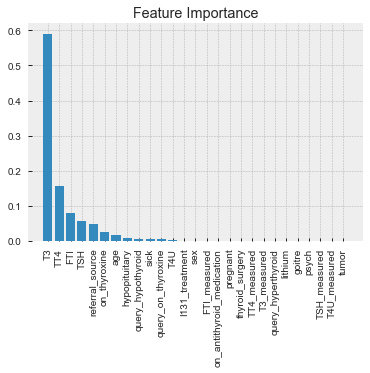

In [84]:
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

In [98]:
importances = clf1.feature_importances_
indices = np.argsort(importances)[::-1]
names = [feature_names[i] for i in indices]

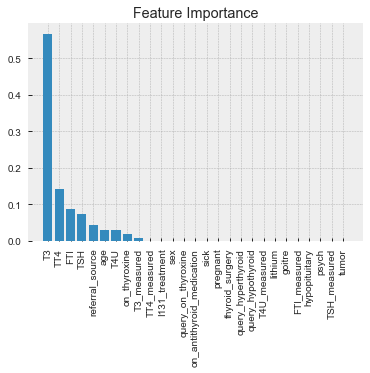

In [99]:
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()